<a href="https://colab.research.google.com/github/bbradfield216/btech-python/blob/main/Advanced_Module_1_project_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis on Melbourne Housing

Brock Bradfield

This analysis explores the data set of housing in Melbourne Australia. Recently, in Melbourne the housing market has seen explosive growth. The point of the project is to try to analyze trends in the housing market and which trends might be useful to an investor.

#About the Data

This data set includes information concerning the suburb, address, rooms, type of property, method, sellerg, date, distance, postcode, number of bedrooms, car, landsize, building area, year built, council area, region name, and property count.

In [ ]:
import pandas as pd
df = pd.read_csv('housing.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

# Analysis
The analysis below explores differernt variables of housing market trends. Specifically, it will explore the following different topics:


* Landsize and the relation to price in accordance with the type of housing

* Average pricing in relation to the year it was built

* Average pricing in relation to the region name

* The year the propery was built in relation to the region name

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,house,1035000,property sold,Biggin,4/2/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,Northern Metropolitan,4019
1,Abbotsford,5 Charles St,3,house,1465000,property sold prior,Biggin,4/3/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,Northern Metropolitan,4019
2,Abbotsford,55a Park St,4,house,1600000,vendor bid,Nelson,4/6/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,Northern Metropolitan,4019
3,Abbotsford,124 Yarra St,3,house,1876000,property sold,Nelson,7/5/2016,2.5,3067,4,2,0.0,245,210.0,1910.0,Yarra,Northern Metropolitan,4019
4,Abbotsford,98 Charles St,2,house,1636000,property sold,Nelson,8/10/2016,2.5,3067,2,1,2.0,256,107.0,1890.0,Yarra,Northern Metropolitan,4019


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6847 entries, 0 to 6846
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6847 non-null   object 
 1   Address        6847 non-null   object 
 2   Rooms          6847 non-null   int64  
 3   Type           6847 non-null   object 
 4   Price          6847 non-null   int64  
 5   Method         6847 non-null   object 
 6   SellerG        6847 non-null   object 
 7   Date           6847 non-null   object 
 8   Distance       6847 non-null   float64
 9   Postcode       6847 non-null   int64  
 10  Bedroom2       6847 non-null   int64  
 11  Bathroom       6847 non-null   int64  
 12  Car            6819 non-null   float64
 13  Landsize       6847 non-null   int64  
 14  BuildingArea   6847 non-null   float64
 15  YearBuilt      6847 non-null   float64
 16  CouncilArea    6187 non-null   object 
 17  Regionname     6847 non-null   object 
 18  Property

In [ ]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
count,6847.000000,6.847000e+03,6847.000000,6847.000000,6847.000000,6847.000000,6819.000000,6847.000000,6847.000000,6847.000000,6847.000000
mean,2.977070,1.079246e+06,10.124814,3104.269461,2.950343,1.592814,1.606541,463.281145,142.959226,1964.295312,7432.043523
std,0.969548,6.732188e+05,5.978374,91.079330,0.969828,0.713867,0.944278,569.612425,82.392850,36.691828,4348.513574
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1830.000000,389.000000
25%,2.000000,6.300000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,165.000000,93.000000,1940.000000,4385.000000
50%,3.000000,8.925000e+05,9.200000,3083.000000,3.000000,1.000000,2.000000,402.000000,126.000000,1970.000000,6567.000000
75%,4.000000,1.336500e+06,13.000000,3148.000000,4.000000,2.000000,2.000000,640.000000,173.000000,2000.000000,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,9838.000000,1561.000000,2018.000000,21650.000000


In [ ]:
df.shape

(6847, 19)

###Landsize and the relation to price in accordance with the type of housing

When considering the relationship between landsize and cost in accordance with the different types of housing, my immediate first thought is the bigger the property the higher the cost. In regards to types of housing, I would think an actual house would cost more vs. a unit or a townhouse, but a townhouse might cost more than just a unit.

-

Accoring to the results of the code below, by far the type of housing that experiences the highest price increase as landsize increases are houses. The other two had small amount of increase in cost as landsize increases.

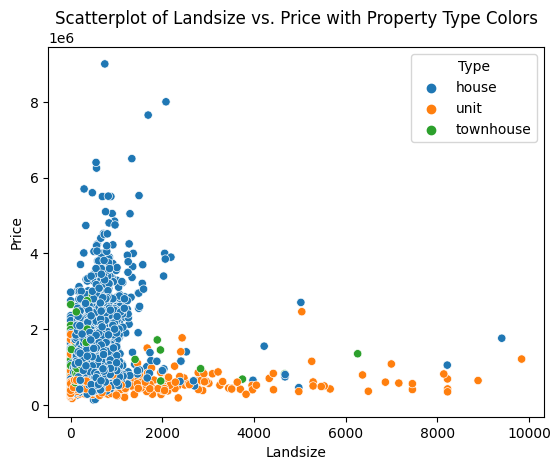

In [ ]:
sns.scatterplot(x='Landsize', y='Price', hue='Type', data=df)
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.title('Scatterplot of Landsize vs. Price with Property Type Colors')
plt.show()

From this analysis I can conclude that the type of housing that would probably cost the least in terms of landsize would either be a townhouse or a unit. And the type of housing the would probably cost the most in terms of landsize would be a house.

###Average Pricing in Relation to the Year it was Built

When considering the relationship between the year the property was built in regards to pricing, my first thought is the newer the property the more it should cost.

-

However according to the result of the code below, surprisingly as the property becomes newer, the price on average decreases.

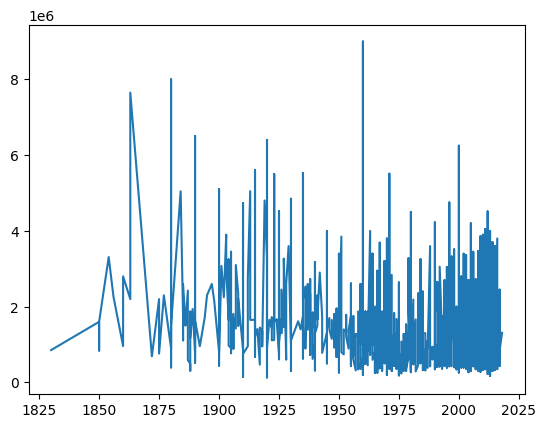

In [ ]:
df.sort_values(by='YearBuilt', inplace=True)
plt.plot(df['YearBuilt'], df['Price'])
plt.show()

In [ ]:
YearBuilt_df = df.groupby('YearBuilt', as_index=False).agg({'Price': 'mean'})
YearBuilt_df

,YearBuilt,Price
0,1830.0,8.550000e+05
1,1850.0,1.347000e+06
2,1854.0,3.310000e+06
3,1856.0,2.260000e+06
4,1860.0,1.980000e+06
...,...,...
130,2014.0,9.519831e+05
131,2015.0,1.255708e+06
132,2016.0,1.529026e+06
133,2017.0,1.041406e+06


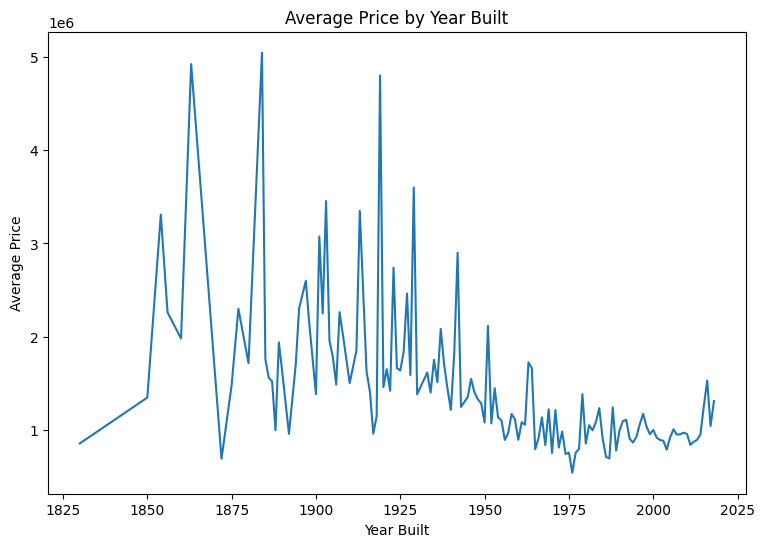

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(YearBuilt_df['YearBuilt'], YearBuilt_df['Price'])
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.title('Average Price by Year Built')
plt.show()

From this analysis I can conclude that as the property becomes newer, surprisingly the cost has decreased over time since 1825 to 2025. As an investor, I would think this is great news. It seems that there's been a little more stability in the housing market on a decreasing trajectory.

###Average Pricing in Relation to the Region Name

When determining the relationship between the average pricing in regards to the region name, I would think that wherever the more populated areas are the higher the pricing. However I do not know which region names are more populated so I can't say which region I think would have the highest or lowest prices.

-

According to the results of the code below, the 'southern metropolitan' region has the highest prices on average. And 'western victoria' regoin has the lowest prices on average.

In [ ]:
region_df = df.groupby('Regionname', as_index=False).agg({'Price': 'mean'})
region_df

,Regionname,Price
0,Eastern Metropolitan,1.118559e+06
1,Eastern Victoria,6.813565e+05
2,Northern Metropolitan,8.765970e+05
3,Northern Victoria,5.694400e+05
4,South-Eastern Metropolitan,9.395747e+05
5,Southern Metropolitan,1.408658e+06
6,Western Metropolitan,8.732954e+05
7,Western Victoria,4.081500e+05


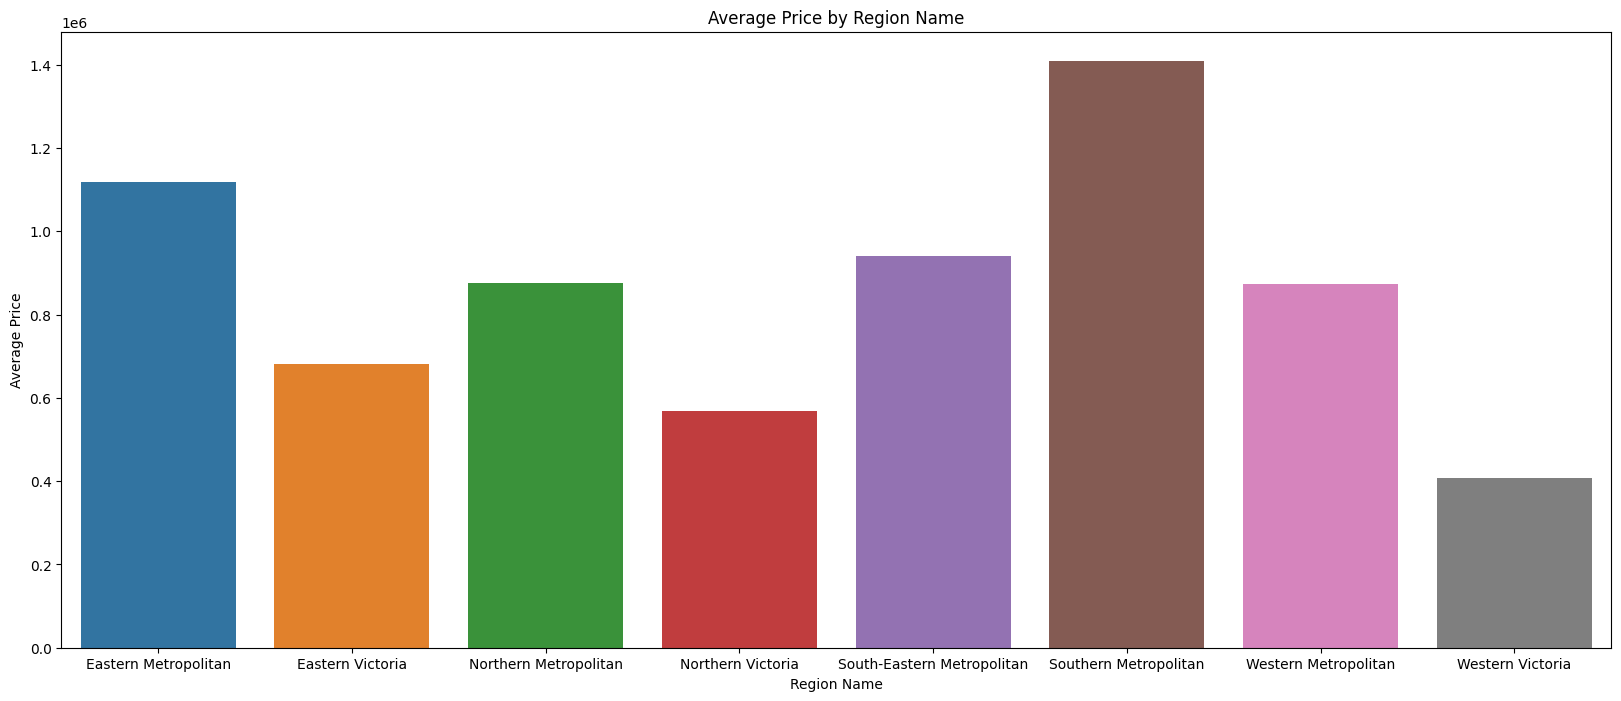

In [ ]:
plt.figure(figsize=(20, 8))
df.sort_values(by='Regionname', inplace=True)
sns.barplot(x= region_df['Regionname'], y= region_df['Price'], data=df)
plt.xlabel('Region Name')
plt.ylabel('Average Price')
plt.title('Average Price by Region Name')
plt.show()

From this analysis I can conclude that the 2 regions with the highest pricing on average is 'southern metropolitan' with the highest pricing. And 'eastern metropolitan' with the second highest pricing on average. The 2 regions with the lowest pricing on average were 'western victoria' and 'northern victoria'. Perhaps, if 'western victoria' provided enough tenants and were populated enough would be a good region to invest in as it's the least costly.

###Propery Prices

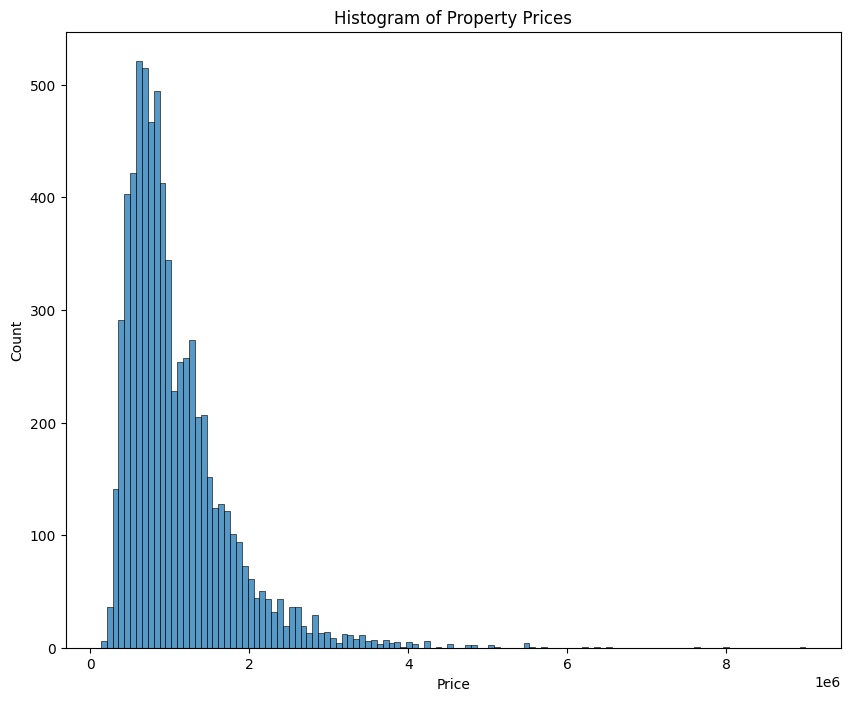

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(x= 'Price', data=df)
plt.title('Histogram of Property Prices')
plt.show()

###The Year the Property was Built in Relation to the Region Name

When determing the year the propery was built and it's relation to the region name, I really can't say too much because I've never been to Melbourne before. However maybe according to the code regarding pricing and it's relation to the region name could help. Maybe because 'western victoria had the least cost on average this would imply it's a little older and therefore less costly. And vice versa with the highest average cost region 'southern metropolitan'. Maybe this region is newer and therefore more costly.

-

According to the results of the code below, the opposite occured the 'southern metropolitan' region is the second most region with properties built over the longest period of time since 1850. 'Northern metropolitan' being the first with properties since 1825. Whereas 'western victoria' has more of the newer properties, having properties since around 1970.

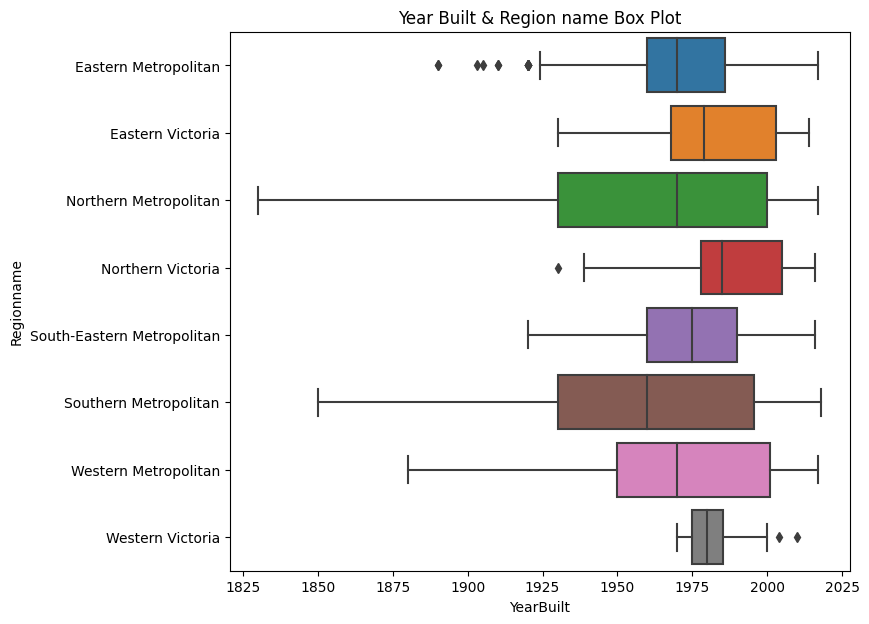

In [ ]:
plt.figure(figsize=(8, 7))
sns.boxplot(x= 'YearBuilt', y= 'Regionname', data=df)
plt.title('Year Built & Region name Box Plot')
plt.show()

From this analysis I can conclude that western victoria may not be the best move for an investor as there hasn't been a lot of expansion since 2000. Therefore indicating perhaps less tenants for investors.

Although the northern metropolitan area may not be the cheapest area, it's also not the most expensive region either. And from what I can see this region has had the most steady expansion since 1825. Maybe the 'northern metropolitan area would indicate steady tenants and least expensive costs.

#Conclusion

Overall we learned that the types of housing that would cost the least are townhouses or units with houses being the most expensive. Overtime since 1825 as housing becomes newer surprisingly the average cost of housing decreased. 'Western Victoria' had the lowest prices on average. The 'Southern Metropolitan' region had the highest prices on average. The 'Northern Metropolitan' region has properties built across the widest range of time. 'Western Victoria' hasn't had a lot of expansion since 2000.

In regards to in investor and according to the data provided, perhaps the best region to invest in would be the 'Northern Metropolitan' region as it's not the most expensive, yet also not the cheapest place to invest.It's more somewhere in the middle compared to all the other regions. It also has properties built across the widest range of time and shows no sign of slowing down expansion indicating plenty of tenants to rent to.

There may be more data that needs to be analalyzed before recommedning investing advice, but with the data that was given, these are my conclusions.